In [170]:
from mppi import Utilities as U, Parsers as P
import matplotlib.pyplot as plt
import numpy as np

# Comparison of the results

We compare the spin magnetization obtained with various sampling (and values of the dephasing) in the same 
region of the k space close to $\Gamma$.

In [171]:
def files_from_path(path):
    import os
    listdir= os.listdir(path)
    ofiles = []
    for file in listdir:
        if 'o-' in file:
            ofiles.append(os.path.join(path,file))
    return ofiles

In [298]:
path_50 = 'RT_k50/FixSymm/dephase_0.002-freq_1.5-int_1000.0-simTime_10000'
path_100 = 'RT_k100/FixSymm/dephase_0.002-freq_1.5-int_1000.0-simTime_10000'
path_50_ld = 'RT_k50/FixSymm/dephase_0.0001-freq_1.5-int_1000.0-simTime_10000'
#path_100_large = 'RT_k100_large_volume/FixSymm/dephase_0.002-freq_1.55-int_1000.0-simTime_6000'

In [299]:
data_50 = P.YamboParser(files_from_path(path_50))
data_100 = P.YamboParser(files_from_path(path_100))
data_50_ld = P.YamboParser(files_from_path(path_50_ld))
#data_100_large = P.YamboParser(files_from_path(path_100_large))

In [300]:
spin_50 = data_50['spin_magnetization']
spin_100 = data_100['spin_magnetization']
spin_50_ld = data_50_ld['spin_magnetization']
#spin_100_large = data_100_large['spin_magnetization']

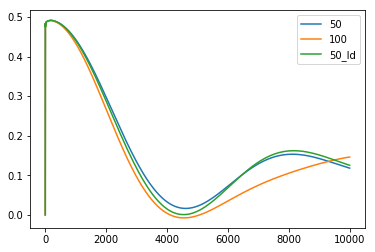

In [301]:
plt.plot(spin_50['time'],spin_50['Mc_z'],label='50')
plt.plot(spin_100['time'],spin_100['Mc_z'],label='100')
plt.plot(spin_50_ld['time'],spin_50_ld['Mc_z'],label='50_ld')
#plt.plot(spin_100_large['time'],spin_100_large['Mc_z'],label='100_large')

plt.legend()

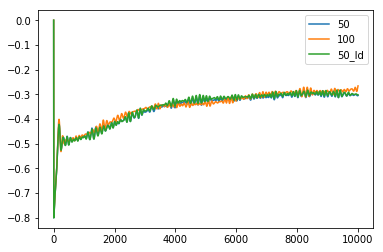

In [302]:
plt.plot(spin_50['time'],spin_50['Mv_z'],label='50')
plt.plot(spin_100['time'],spin_100['Mv_z'],label='100')
plt.plot(spin_50_ld['time'],spin_50_ld['Mv_z'],label='50_ld')
#plt.plot(spin_100_large['time'],spin_100_large['Mv_z'],label='100')
plt.legend()

## Sum of oscillatory functions

In [312]:
sim_time = 20000 # in fs
t = np.arange(0.,sim_time)

In [313]:
r_50 = P.PwParser('NSCF/bnds_16-kpoints_50-sampling_random_close_Gamma.save/data-file-schema.xml')
r_100 = P.PwParser('NSCF/bnds_16-kpoints_100-sampling_random_close_Gamma.save/data-file-schema.xml')
r_200 = P.PwParser('NSCF/bnds_16-kpoints_200-sampling_random_close_Gamma.save/data-file-schema.xml')

transitions_50 = 1e3*r_50.get_transitions(set_gap=1.42,initial=[8,9],final=[8,9])
transitions_100 = 1e3*r_100.get_transitions(set_gap=1.42,initial=[8,9],final=[8,9])
transitions_200 = 1e3*r_200.get_transitions(set_gap=1.42,initial=[8,9],final=[8,9])

Parse file : NSCF/bnds_16-kpoints_50-sampling_random_close_Gamma.save/data-file-schema.xml
Parse file : NSCF/bnds_16-kpoints_100-sampling_random_close_Gamma.save/data-file-schema.xml
Parse file : NSCF/bnds_16-kpoints_200-sampling_random_close_Gamma.save/data-file-schema.xml
Apply a scissor of 0.5456147497318283 eV
Apply a scissor of 0.5456147497318283 eV
Apply a scissor of 0.5456147497318283 eV


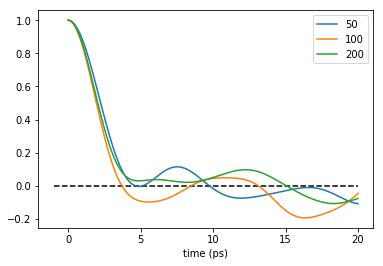

In [315]:
f_sum = 0.
for e in transitions_50:
    #print(e[0])
    nu = e[0]/(U.Planck_ev_ps*1e6)
    f_sum += np.cos(2*np.pi*nu*t)   
plt.plot(t/1000,f_sum/50,label=50)

f_sum = 0.
for e in transitions_100:
    #print(e[0])
    nu = e[0]/(U.Planck_ev_ps*1e6)
    f_sum += np.cos(2*np.pi*nu*t)
plt.plot(t/1000,f_sum/100,label=100)

f_sum = 0.
for e in transitions_200:
    #print(e[0])
    nu = e[0]/(U.Planck_ev_ps*1e6)
    f_sum += np.cos(2*np.pi*nu*t)
plt.plot(t/1000,f_sum/200,label=200)


plt.hlines(0,-1,20,linestyles='--')
plt.xlabel('time (ps)')
plt.legend()
plt.show()

__We observe a kpoint sampling induced damping in the time behavior of the magnetization.__

In [ ]:
#####################################################################################à

We analyze the short oscillations of the valence magnetization

In [128]:
time = spin_50['time'][2000:3500]
mv = spin_50['Mv_z'][2000:3500]

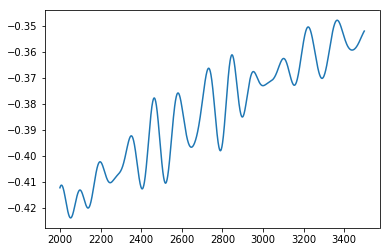

In [129]:
plt.plot(time,mv)

In [130]:
from scipy.signal import argrelextrema

In [131]:
t_max = time[argrelextrema(mv, np.greater)[0]]
t_max

array([2008., 2099., 2198., 2351., 2464., 2582., 2733., 2847., 2953.,
       3102., 3223., 3365.])

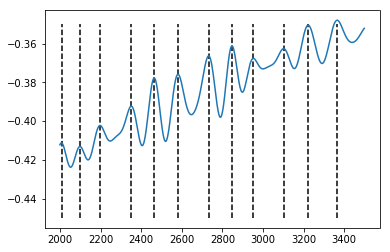

In [132]:
plt.plot(time,mv)
for t in t_max:
    plt.vlines(t,-0.45,-0.35,linestyles='--')
plt.show()

In [133]:
deltaT = []
for ind in range(len(t_max)-1):
    deltaT.append(t_max[ind+1]-t_max[ind])
deltaT

[91.0, 99.0, 153.0, 113.0, 118.0, 151.0, 114.0, 106.0, 149.0, 121.0, 142.0]

In [134]:
energies = U.Planck_ev_ps*1e6/np.array(deltaT) # in meV

In [135]:
energies

array([45.44689776, 41.77442117, 27.03050782, 36.59882917, 35.04803132,
       27.38852779, 36.27778681, 39.01573298, 27.75615903, 34.17907187,
       29.12442039])

In [136]:
data = P.PwParser('NSCF/bnds_16-kpoints_50-sampling_random_close_Gamma.save/data-file-schema.xml')

Parse file : NSCF/bnds_16-kpoints_50-sampling_random_close_Gamma.save/data-file-schema.xml


In [148]:
weights = data.weights

In [149]:
trans_valence = 1e3*data.get_transitions(initial=[5,6,7,8],final=[5,6,7,8])

In [158]:
dos = U.Dos()
dos.append_fromPwData(trans_valence,weights,minVal=0,maxVal=60,eta=1,label='trans_val')

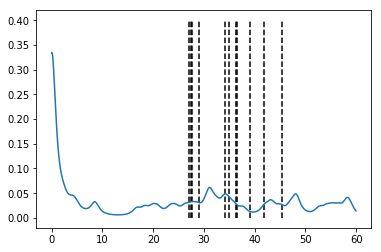

In [160]:
dos.plot(plt)
for e in energies:
    plt.vlines(e,0,0.4,linestyles='--')

In [165]:
U.Planck_ev_ps*1e3/1.5

2.7571117973333332